# ukol-01: Swing States

In [36]:
import pandas
import numpy

In [37]:
data = pandas.read_csv("1976-2020-president.csv")
data.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER


## 1. část

year - rok voleb,
state - stát,
party_simplified - zjednodušené označení politické strany,
candidatevotes - počet hlasů pro vybraného kandidáta,
totalvotes - celkový počet odevzdaných hlasů.

### 1. Urči pořadí jednotlivých kandidátů v jednotlivých státech a v jednotlivých letech (pomocí metody rank()). Nezapomeň, že data je před použitím metody nutné seřadit a spolu s metodou rank() je nutné použít metodu groupby().

In [38]:
data["rank"] = data.groupby(["year", "state"])["candidatevotes"].rank(ascending=False, method="min")
data.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN,2.0
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER,3.0
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER,4.0
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER,5.0


### 2. Pro další analýzu jsou důležití pouze vítězové. Vytvoř novou tabulku, která bude obsahovat pouze vítěze voleb.

In [39]:
winners = data[data["rank"] == 1.0]
winners = winners.sort_values(["state", "year"])
winners.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0
332,1980,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,654192,1341929,20210113,NaN,REPUBLICAN,1.0
696,1984,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,872849,1441713,20210113,NaN,REPUBLICAN,1.0
1019,1988,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,815576,1378476,20210113,NaN,REPUBLICAN,1.0
1304,1992,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,804283,1688060,20210113,NaN,REPUBLICAN,1.0


### 3. Pomocí metody shift() přidej nový sloupec, abys v jednotlivých řádcích měl(a) po sobě vítězné strany ve dvou po sobě jdoucích letech.

In [40]:
winners["previous_year_party"] = winners.groupby(["state"])["party_simplified"].shift(1)
winners.head(15)

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank,previous_year_party
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0,NaN
332,1980,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,654192,1341929,20210113,NaN,REPUBLICAN,1.0,DEMOCRAT
696,1984,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,872849,1441713,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN
1019,1988,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,815576,1378476,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN
1304,1992,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,804283,1688060,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN
1674,1996,ALABAMA,AL,1,63,41,US PRESIDENT,"DOLE, ROBERT",REPUBLICAN,False,769044,1534349,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN
2042,2000,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE W.",REPUBLICAN,False,941173,1666272,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN
2411,2004,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE W.",REPUBLICAN,False,1176394,1883415,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN
2728,2008,ALABAMA,AL,1,63,41,US PRESIDENT,"MCCAIN, JOHN",REPUBLICAN,False,1266546,2099819,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN
3079,2012,ALABAMA,AL,1,63,41,US PRESIDENT,"ROMNEY, MITT",REPUBLICAN,False,1255925,2074338,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN


### 4. Porovnej, jestli se ve dvou po sobě jdoucích letech změnila vítězná strana. Můžeš k tomu použít např. funkci numpy.where() nebo metodu apply().

In [41]:
#Zbavit se řádků, u kterých neznáme předchozí vítěznou stranu (t. j. rok 1976)
winners = winners.dropna(subset=["previous_year_party"])
#Porovnání - nalezení změny
winners["change"] = numpy.where(winners["party_simplified"] == winners["previous_year_party"], 0, 1)
winners.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank,previous_year_party,change
332,1980,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,654192,1341929,20210113,NaN,REPUBLICAN,1.0,DEMOCRAT,1
696,1984,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,872849,1441713,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0
1019,1988,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,815576,1378476,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0
1304,1992,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,804283,1688060,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0
1674,1996,ALABAMA,AL,1,63,41,US PRESIDENT,"DOLE, ROBERT",REPUBLICAN,False,769044,1534349,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0


### 5. Proveď agregaci podle názvu státu a seřaď státy podle počtu změn vítězných stran.

In [42]:
swing_states = winners.groupby(["state"])["change"].sum()
swing_states = pandas.DataFrame(swing_states)
swing_states = swing_states.sort_values("change", ascending=False)
swing_states

,change
state,
OHIO,5
FLORIDA,5
GEORGIA,4
WISCONSIN,4
IOWA,4
PENNSYLVANIA,4
NEVADA,3
TENNESSEE,3
LOUISIANA,3


### 6. Vytvoř sloupcový graf s 10 státy, kde došlo k nejčastější změně vítězné strany. Jako výšku sloupce nastav počet změn.

<AxesSubplot: xlabel='state'>

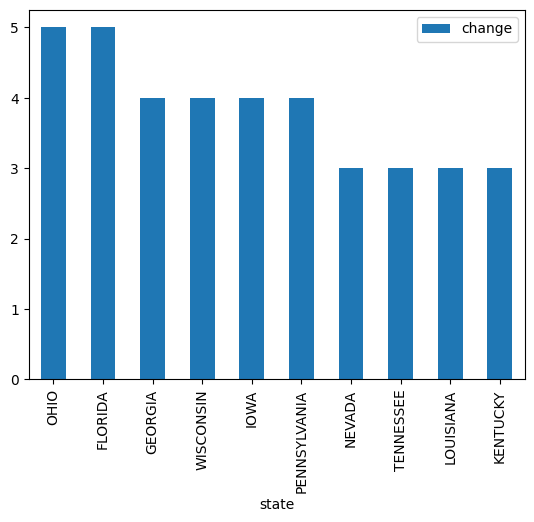

In [43]:
top10_swing_states = swing_states.iloc[:10]
top10_swing_states.plot(kind="bar")

## 2. část

Pro další část pracuj s tabulkou se dvěma nejúspěšnějšími kandidáty pro každý rok a stát (tj. s tabulkou, která oproti té minulé neobsahuje jen vítěze, ale i druhého v pořadí).

In [44]:
two_winners = data[data["rank"].isin([1.0, 2.0])]
two_winners = two_winners.sort_values(["year", "state", "rank"])
two_winners.tail(35)

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank
4138,2020,NORTH CAROLINA,NC,37,56,47,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,2684292,5524802,20210113,NaN,DEMOCRAT,2.0
4144,2020,NORTH DAKOTA,ND,38,44,36,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,235595,361819,20210113,NaN,REPUBLICAN,1.0
4145,2020,NORTH DAKOTA,ND,38,44,36,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,114902,361819,20210113,NaN,DEMOCRAT,2.0
4148,2020,OHIO,OH,39,31,24,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,3154834,5922202,20210113,NaN,REPUBLICAN,1.0
4149,2020,OHIO,OH,39,31,24,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,2679165,5922202,20210113,NaN,DEMOCRAT,2.0
4158,2020,OKLAHOMA,OK,40,73,53,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,1020280,1560699,20210113,NaN,REPUBLICAN,1.0
4159,2020,OKLAHOMA,OK,40,73,53,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,503890,1560699,20210113,NaN,DEMOCRAT,2.0
4165,2020,OREGON,OR,41,92,72,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,1340383,2374321,20210113,NaN,DEMOCRAT,1.0
4164,2020,OREGON,OR,41,92,72,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,958448,2374321,20210113,NaN,REPUBLICAN,2.0
4171,2020,PENNSYLVANIA,PA,42,23,14,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,3458229,6915283,20210113,NaN,DEMOCRAT,1.0


### 1. Přidej do tabulky sloupec, který obsahuje absolutní rozdíl mezi vítězem a druhým v pořadí.

In [45]:
#přidat sloupec s počtem hlasů druhého kandidáta k řádkům vítěze
two_winners["second_candidate_votes"] = two_winners.groupby(["year", "state"])["candidatevotes"].shift(-1)
#odstranit řádky s kandidátem druhým v pořadí
two_winners = two_winners[two_winners["rank"] == 1.0]
two_winners.tail(40)

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank,second_candidate_votes
3881,2020,HAWAII,HI,15,95,82,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,366130,579784,20210113,NaN,DEMOCRAT,1.0,196864.0
3890,2020,IDAHO,ID,16,82,63,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,554119,868014,20210113,NaN,REPUBLICAN,1.0,287021.0
3904,2020,ILLINOIS,IL,17,33,21,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,3471915,6033743,20210113,NaN,DEMOCRAT,1.0,2446891.0
3925,2020,INDIANA,IN,18,32,22,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,1729519,3033118,20210113,NaN,REPUBLICAN,1.0,1242416.0
3938,2020,IOWA,IA,19,42,31,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,897672,1700130,20210113,NaN,REPUBLICAN,1.0,759061.0
3950,2020,KANSAS,KS,20,47,32,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,771406,1372303,20210113,NaN,REPUBLICAN,1.0,570323.0
3953,2020,KENTUCKY,KY,21,61,51,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,1326646,2136768,20210113,NaN,REPUBLICAN,1.0,772474.0
3970,2020,LOUISIANA,LA,22,72,45,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,1255776,2148062,20210113,NaN,REPUBLICAN,1.0,856034.0
3981,2020,MAINE,ME,23,11,2,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,435072,828305,20210113,NaN,DEMOCRAT,1.0,360737.0
3989,2020,MARYLAND,MD,24,52,52,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,1985023,3037030,20210113,NaN,DEMOCRAT,1.0,976414.0


In [46]:
two_winners["vote_difference"] = two_winners["candidatevotes"] - two_winners["second_candidate_votes"]
two_winners.tail()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank,second_candidate_votes,vote_difference
4252,2020,VIRGINIA,VA,51,54,40,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,2413568,4460524,20210113,NaN,DEMOCRAT,1.0,1962430.0,451138.0
4256,2020,WASHINGTON,WA,53,91,73,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,2369612,4087631,20210113,NaN,DEMOCRAT,1.0,1584651.0,784961.0
4264,2020,WEST VIRGINIA,WV,54,55,56,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,545382,794652,20210113,NaN,REPUBLICAN,1.0,235984.0,309398.0
4267,2020,WISCONSIN,WI,55,35,25,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,1630866,3298041,20210113,NaN,DEMOCRAT,1.0,1610184.0,20682.0
4281,2020,WYOMING,WY,56,83,68,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,193559,278503,20210113,NaN,REPUBLICAN,1.0,73491.0,120068.0


### 2. Přidej sloupec s relativním marginem, tj. rozdílem vyděleným počtem hlasů.

In [47]:
two_winners["relative_margin"] = two_winners["vote_difference"] / two_winners["totalvotes"]
two_winners.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank,second_candidate_votes,vote_difference,relative_margin
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0,504070.0,155100.0,0.131124
7,1976,ALASKA,AK,2,94,81,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,71555,123574,20210113,NaN,REPUBLICAN,1.0,44058.0,27497.0,0.222514
11,1976,ARIZONA,AZ,4,86,61,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,418642,742719,20210113,NaN,REPUBLICAN,1.0,295602.0,123040.0,0.165662
19,1976,ARKANSAS,AR,5,71,42,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,498604,767535,20210113,NaN,DEMOCRAT,1.0,267903.0,230701.0,0.300574
23,1976,CALIFORNIA,CA,6,93,71,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,3882244,7803770,20210113,NaN,REPUBLICAN,1.0,3742284.0,139960.0,0.017935


### 3. Seřaď tabulku podle velikosti relativního marginu a zjisti, kdy a ve kterém státě byl výsledek voleb nejtěsnější.

In [59]:
two_winners = two_winners.sort_values(["relative_margin"])
two_winners.head(10)
#Výsledek byl nejtěsnější na Floridě v roce 2000 (relative margin = 0,00009, rozdíl 537 hlasů)

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank,second_candidate_votes,vote_difference,relative_margin
2106,2000,FLORIDA,FL,12,59,43,US PRESIDENT,"BUSH, GEORGE W.",REPUBLICAN,False,2912790,5963110,20210113,NaN,REPUBLICAN,1.0,2912253.0,537.0,0.000090
2266,2000,NEW MEXICO,NM,35,85,66,US PRESIDENT,"GORE, AL",DEMOCRAT,False,286783,598605,20210113,NaN,DEMOCRAT,1.0,286417.0,366.0,0.000611
2907,2008,MISSOURI,MO,29,43,34,US PRESIDENT,"MCCAIN, JOHN",REPUBLICAN,False,1445814,2925205,20210113,NaN,REPUBLICAN,1.0,1441911.0,3903.0,0.001334
479,1980,MASSACHUSETTS,MA,25,14,3,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,1057631,2524090,20210113,NaN,REPUBLICAN,1.0,1053802.0,3829.0,0.001517
241,1976,OREGON,OR,41,92,72,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,492120,1029876,20210113,NaN,REPUBLICAN,1.0,490407.0,1713.0,0.001663
840,1984,MINNESOTA,MN,27,41,33,US PRESIDENT,"MONDALE, WALTER",DEMOCRAT,False,1036364,2084449,20210113,NaN,DEMOCRAT,1.0,1032603.0,3761.0,0.001804
2398,2000,WISCONSIN,WI,55,35,25,US PRESIDENT,"GORE, AL",DEMOCRAT,False,1242987,2598607,20210113,NaN,DEMOCRAT,1.0,1237279.0,5708.0,0.002197
3551,2016,MICHIGAN,MI,26,34,23,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,2279543,4799284,20210113,NaN,REPUBLICAN,1.0,2268839.0,10704.0,0.002230
228,1976,OHIO,OH,39,31,24,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,2009959,4110456,20210113,NaN,DEMOCRAT,1.0,2000626.0,9333.0,0.002271
3878,2020,GEORGIA,GA,13,58,44,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,2473633,4999960,20210113,NaN,DEMOCRAT,1.0,2461854.0,11779.0,0.002356


### 4. Vytvoř pivot tabulku, která zobrazí pro jednotlivé volební roky, kolik států přešlo od Republikánské strany k Demokratické straně, kolik států přešlo od Demokratické strany k Republikánské straně a kolik států volilo kandidáta stejné strany.

In [56]:
def swing(row) -> str:
    """
    Funkce, která určí jestli v daném roce a státě došlo ke změně strany (swing) a jak (to Republican nebo to Democrat, případně jinak) nebo k ní nedošlo (no swing)
    """
    if row["party_simplified"] == row["previous_year_party"]:
        return "no swing"
    else:
        if row["party_simplified"] == "REPUBLICAN":
            return "to Republican"
        elif row["party_simplified"] == "DEMOCRAT":
            return "to Democrat"
        else:
            return "other"

In [54]:
#přidat sloupec "swing" pomocí aplikace funkce swing, která určuje zda došlo ke změně vítězné strany kandidáta nebo ne a pokud ano, tak jak
winners["swing"] = winners.apply(swing, axis=1)
winners

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank,previous_year_party,change,swing
332,1980,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,654192,1341929,20210113,NaN,REPUBLICAN,1.0,DEMOCRAT,1,to Republican
696,1984,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,872849,1441713,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0,no swing
1019,1988,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,815576,1378476,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0,no swing
1304,1992,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,804283,1688060,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0,no swing
1674,1996,ALABAMA,AL,1,63,41,US PRESIDENT,"DOLE, ROBERT",REPUBLICAN,False,769044,1534349,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0,no swing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2722,2004,WYOMING,WY,56,83,68,US PRESIDENT,"BUSH, GEORGE W.",REPUBLICAN,False,167629,243861,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0,no swing
3073,2008,WYOMING,WY,56,83,68,US PRESIDENT,"MCCAIN, JOHN",REPUBLICAN,False,164958,254904,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0,no swing
3388,2012,WYOMING,WY,56,83,68,US PRESIDENT,"ROMNEY, MITT",REPUBLICAN,False,170962,250701,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0,no swing
3732,2016,WYOMING,WY,56,83,68,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,174419,258788,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0,no swing


In [55]:
#vytvořit kontingenční tabulku
winners_pivot = pandas.pivot_table(data=winners, index="year", columns="swing", values="rank", aggfunc=sum)
winners_pivot
#Výsledek: většina států volí kandidáta stejné strany

swing,no swing,to Democrat,to Republican
year,,,
1980,35.0,NaN,16.0
1984,45.0,NaN,6.0
1988,42.0,9.0,NaN
1992,29.0,22.0,NaN
1996,46.0,2.0,3.0
2000,40.0,NaN,11.0
2004,48.0,1.0,2.0
2008,42.0,9.0,NaN
2012,49.0,NaN,2.0


## Shrnutí výsledků:

Analýza výsledků prezidentských voleb v USA od roku 1976 do roku 2020 potvrzuje, že ve většině státech pravidelně vítězí kandidáti stejné strany.
Nejvíce změn v tomto směru se stalo v letech 1980 a 1992. V roce 1980 zvítězil kandidát republikánské strany v 16 státech, ve kterých předím zvítězil kandidát strany demokratické. Naopak, v roce 1992 ve 22 státech, ve kterých předtím zvítězil kandidát republikánské strany, vítězí demokrat. Nejméně změn se stalo v roce 2012, kdy pouze 2 země zvolily kandidáta jiné strany než v předchozích volbách.

Státy, ve kterých došlo k nejvíce změnám jsou Florida a Ohio, kde 5 krát zvítězil kandidát jiné strany než v přechozích volbách. Celkem 10 států zvolilo kandidáta jedné a té samé strany za celé období (1976-2020).

Dva nejtěsnější výsledky voleb za dané období registrujeme pro rok 2000. Na Floridě v tomto roce byl výsledek úplně nejtěsnější (poměrný rozdíl = 0.00009; absolutní rozdíl = 537 hlasů), kdy nakonec zvítězila stejná strana jako ve volbách předešlých (Republikánská strana). Na druhém místě nacházíme Nové Mexiko, kdy druhého kandidáta dělilo od vítězství pouze 366 hlasů (t. j. relativní rozdíl byl 0.000611). I v tomto případě nakonec nedošlo ke změně vítězné strany a zvítězil demokratický kandidát.

Vypadá to, že na Floridě se kandidáti za Demokraty a Republikány o své voliče přetahují nejvíc.